<a href="https://colab.research.google.com/github/neip313/Python_Machine_Learning/blob/main/Kaggle_Titanic_transcription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## II. Kaggle KPI 설치
- `Google Colab`에서 `Kaggle API`를 불러오려면 다음 소스코드를 실행한다. 

In [ ]:
!pip install kaggle

## III. Kaggle Token 다운로드
- Kaggle에서 `API Token`을 다운로드 받는다. 
- [Kaggle]-[My Account]-[API]-[Create New API Token]을 누르면 kaggle.json 파일이 다운로드 된다. 
- 이 파일을 바탕화면에 옮긴 뒤, 아래 코드를 실행 시킨다.

# Part1 : Exploratory Data Analysis(EDA) 


In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# kaggle.json을 아래 폴더로 옮긴 뒤, file을 사용할 수 있도록 권한을 부여한다. 
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
uploaded file "kaggle.json" with length 68 bytes


In [ ]:
ls -1ha ~/.kaggle/kaggle.json

/root/.kaggle/kaggle.json


- 에러 메시지가 없으면 성공적으로 `json` 파일이 업로드 되었다는 뜻이다.


## IV. Kaggle 데이터 불러오기
- 먼저 kaggle competition list를 불러온다.

In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        134           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        186           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        317           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2373           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      18236            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4579            True  
connectx

titanic 데이터를 불러온다. 

In [ ]:
!kaggle competitions download -c titanic

test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


ls 로 경로 내 모든 데이터 파일을 확인한다. 

In [ ]:
!ls

gender_submission.csv  sample_data  test.csv  train.csv


### (1) 데이터 수집
- 지난 시간에 받은 데이터가 총 4개임을 확인했다.
  + data_description.txt
  + sample_submission.csv
  + test.csv
  + train.csv
- 여기에서는 우선 `test.csv` & `train.csv` 파일을 받도록 한다. 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

 train 데이터를 불러와서 data로 넣어주자 

In [ ]:
data= pd.read_csv('train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum() # 결측치를 확인해준다. 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age와 Cabin에 결측값이 있는 것을 확인했다. 나는 이들을 고치도록 노력할 것이다. 

**얼마나 살아남았는가?** 

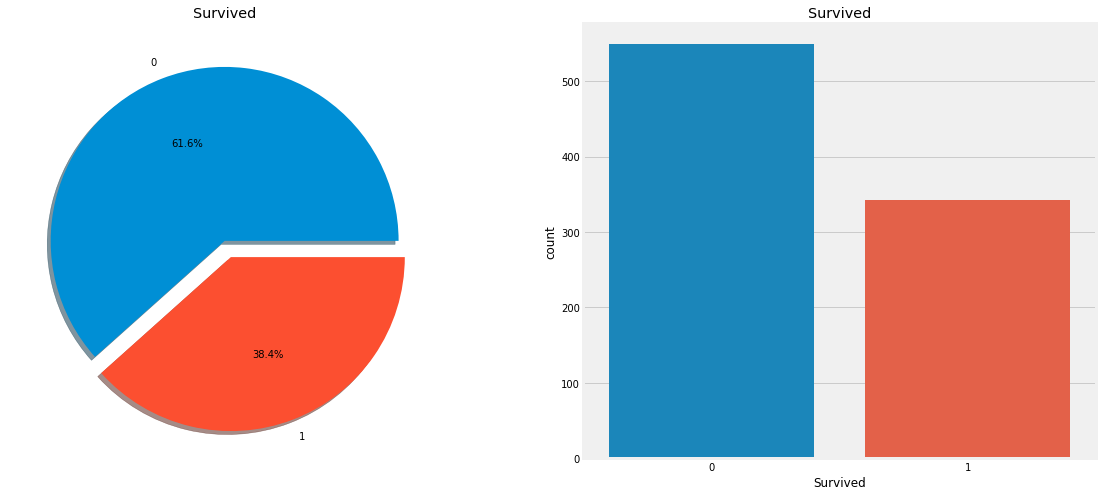

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived') # 제목 붙여주기 
ax[0].set_ylabel('') # y축에 있는 라벨 제거
sns.countplot('Survived',data=data,ax=ax[1]) # seaborn countplot 적용
ax[1].set_title('Survived') # 좌측 표에 제목 추가 
plt.show()

**특징 분석**

**sex -> Categorical Feature** 

In [ ]:
data.groupby(['Sex', 'Survived'])['Survived'].count() # 'Sex', 'Survived' 카테고리 그룹화 

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

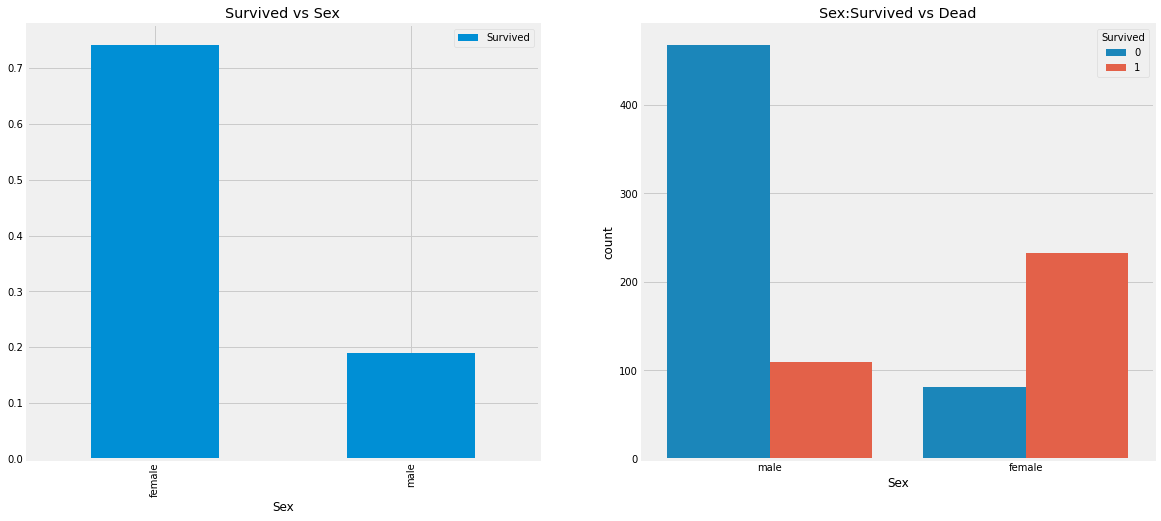

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8)) # 도표 생성
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) # 성별에 따른 생존자 시각화 
ax[0].set_title('Survived vs Sex') # 제목 생성 
sns.countplot('Sex', hue='Survived', data=data,ax=ax[1]) # 우측 도표에 생존자 사망자 비교 그래프 생성 
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

배에 타고 있는 남성의 숫자가 훨씬 많은 반면 구조된 여성의 수는 구조된 남성의 수보다 거의 두배나 많다. 배에 타고 있는 여성의 생존율을 약 75%인 반면 남성은 약 18~19%이다. 이것은 모델링을 위해 매우 중요한 특징으로 보인다. 하지만 그게 최고일까? 다른 기능을 확인해보자. 

In [ ]:
pd.crosstab(data.Pclass, data.Survived, margins=True). style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


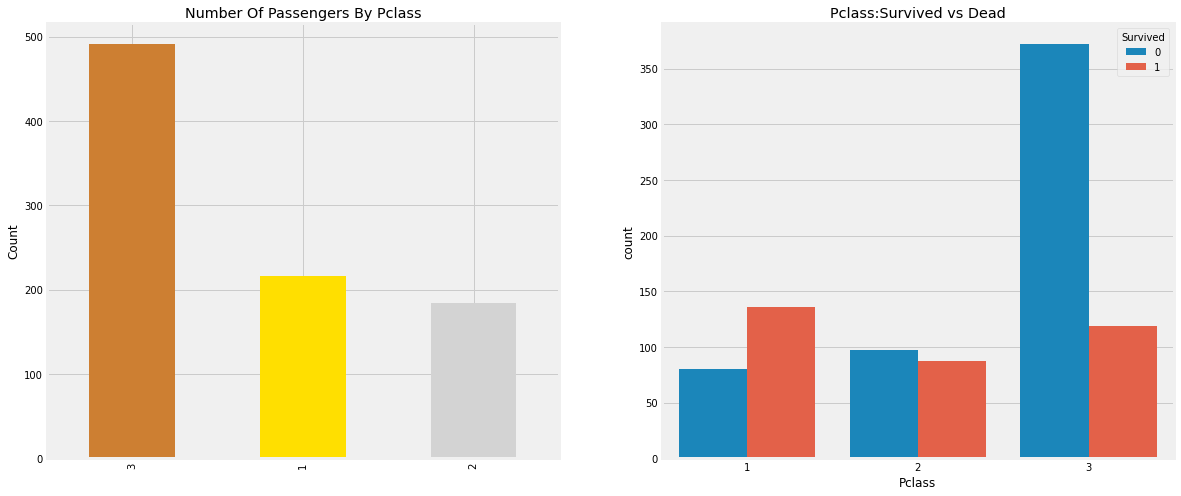

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8)) # 표 2개 생성 
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0]) # 객실 등급별 숫자 시각화
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count') # y축에 Count 라벨링 
sns.countplot('Pclass', hue= 'Survived', data=data, ax=ax[1]) # 우측 그래프에 생존자와 사망자 구별
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()


우리는 돈이 모든 것을 살 수 없다 말하지만 위 데이터를 보면 높은 등급의 객실 사람들 일수록 더 높은 생존률을 보이는 것을 알 수 있다. 

이제는 성별과 객실 등급을 함께 확인해보자. 

In [ ]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')


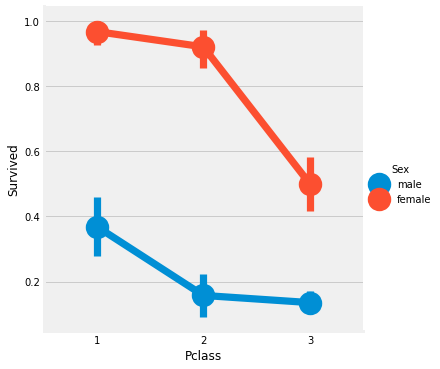

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

우리는 1등급 객실의 여성 생존률이 95~96%인 것을 알 수 있다. 94명 중에 고작 3명 밖에 안죽었다. 남성과의 비교를 통해 객실의 관계없이 구조하는 동안 여성에게 우선권이 주어졌다는 것은 명백하다. 심지어 1등급 객실에서도 남성들의 생존율이 매우 낮다. 

이를 통해 객실등급이 중요한 특성이라는 것을 확인할 수 있었다. 다른 특성을 확인해보자.

**나이 특징**

In [ ]:
print('Oldest Passenger was of :', data['Age'].max(),'Years')
print('Youngest Passenger was of :', data['Age'].min(),'Years')
print('Average Age on the ship :', data['Age'].mean(),'Years')


Oldest Passenger was of : 80.0 Years
Youngest Passenger was of : 0.42 Years
Average Age on the ship : 29.69911764705882 Years


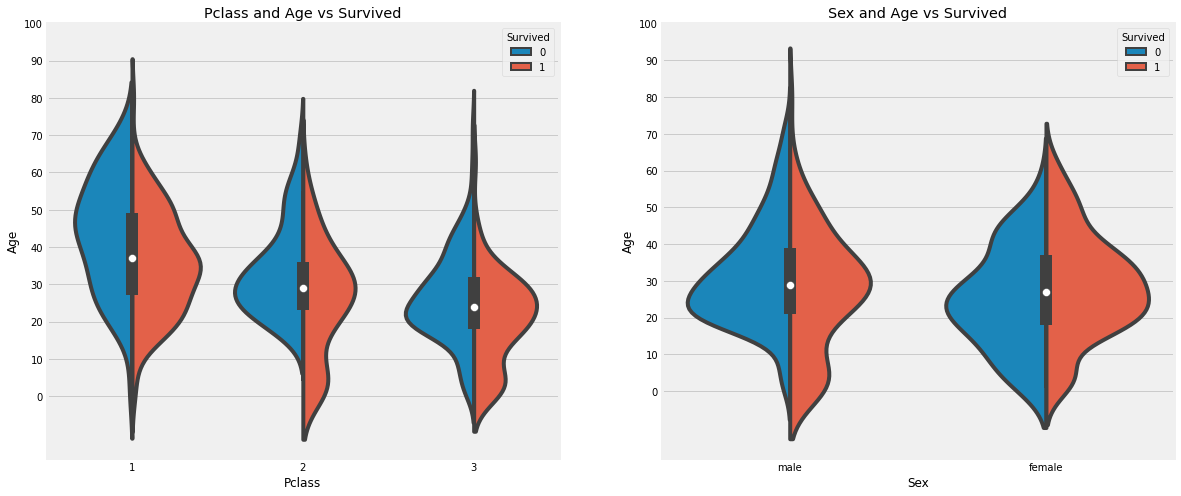

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10)) # y축 범위 설정 
sns.violinplot("Sex", "Age", hue="Survived", data = data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

**관찰결과)**
1. 객실 등급에 따라 자녀 수가 증가하고 10세 미만의 승객 생존률은 객실 등급에 관계없이 양호한 것으로 보인다. 

2. 1등급 객실에서 20~50세 승객의 생존 가능성은 높고 여성에게는 더욱 좋다. 

3. 남성의 경우 나이가 많을 수록 생존가능성은 줄어든다. 

우리는 이전에 Age 177개의 결측값이 있던 것을 확인했다. 우리는 여기에 평균값을 넣어줄 수 있다. 

하지만 우리는 이 때 나이가 적거나 낮은 사람에게 적절하지 않은 평균을 넣으면 문제가 생길 수 있다는 것을 알고있다. 그러면 고객의 연령대를 예측할 수 있는 방법은 없을까? 

있다! 우리는 승객 이름의 특징을 확인할 수 있다. 우리는 승객들의 이름에 Mr 또는 Mrs등의 특징이 있다는 것을 알수 있다. 따라서 우리는 Mr, Mrs의 평균값을 각 그룹에 할당할 수 있다. 

**이름에 무엇이 붙는 가 특징!!** 

In [ ]:
data['Initial']=0
for i in data:
  data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

자, 이제 Regex를 사용합시다. A-Z 또는 a-z사이에 있는 문자열을 찾고, 그 뒤에 .(점)이 있는 문자열을 찾는 겁니다. 그래서 우리는 이름에서 이니셜을 성공적으로 추출했다. 

In [ ]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r') 
# 성별에 있는 이니셜 체크 

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


좋다. 위를 보면 mlle이나 Mme와 같은 철자가 틀린 이니셜이 있는데 이는 Miss를 나타낸다. 나는 그것들을 미스나 다른 가치에 대해서도 같은 것으로 대체할 것이다. 


In [ ]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

**나이 결측치 채워주기**


In [ ]:
# 이니셜별로 평균연령을 추가해준다. 
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [ ]:
data.Age.isnull().any() # 남은 결측치가 있는지 최종 확인   

False

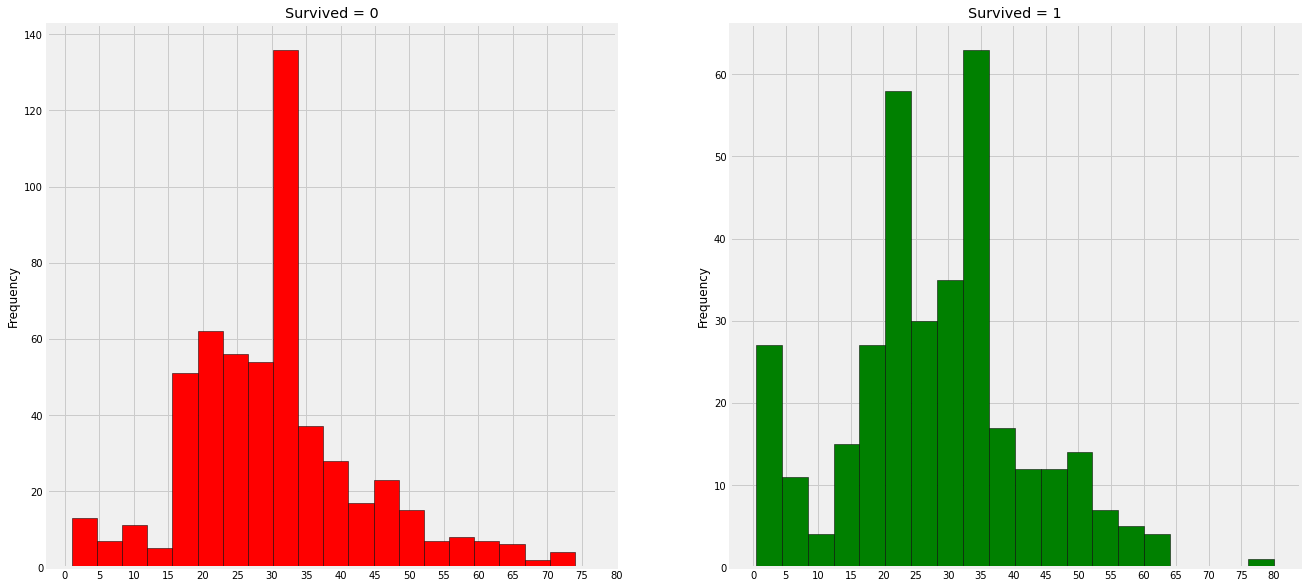

In [ ]:
 f,ax=plt.subplots(1,2,figsize=(20,10))
 data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20, edgecolor='black', color='red')
 ax[0].set_title('Survived = 0')
 x1= list(range(0,85,5))
 ax[0].set_xticks(x1)
 data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
 ax[1].set_title('Survived = 1')
 x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

**관찰일지)**

1) 5세 미만의 아기들은 상당 수 구조되었다. 

2) 가장 나이가 많은 승객은 구조되었다. 

3) 가장 사망자 수가 많은 나이대는 30~40세이다. 

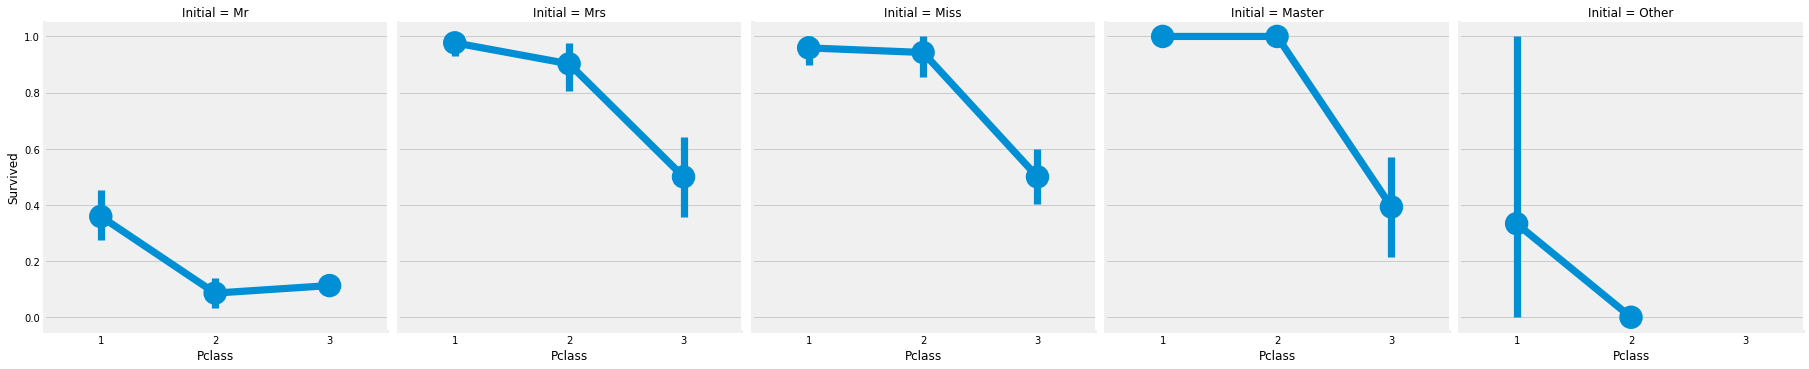

In [ ]:
sns.factorplot('Pclass', 'Survived', col = 'Initial', data = data)
plt.show()

따라서 부녀자 우선 구조 정책은 계층에 관계없이 적용된다. 

**승선 - > 범주형 데이터** 

In [ ]:
pd.crosstab([data.Embarked, data.Pclass],[data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

**항만별 생존 가능성** 

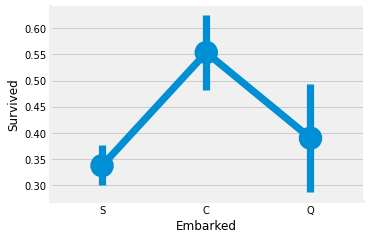

In [ ]:
sns.factorplot('Embarked', 'Survived', data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

C항만에서 승선한 사람들이 가장 생존률이 높았고, S항만에서 승선한 사람들이 가장 낮았다. 

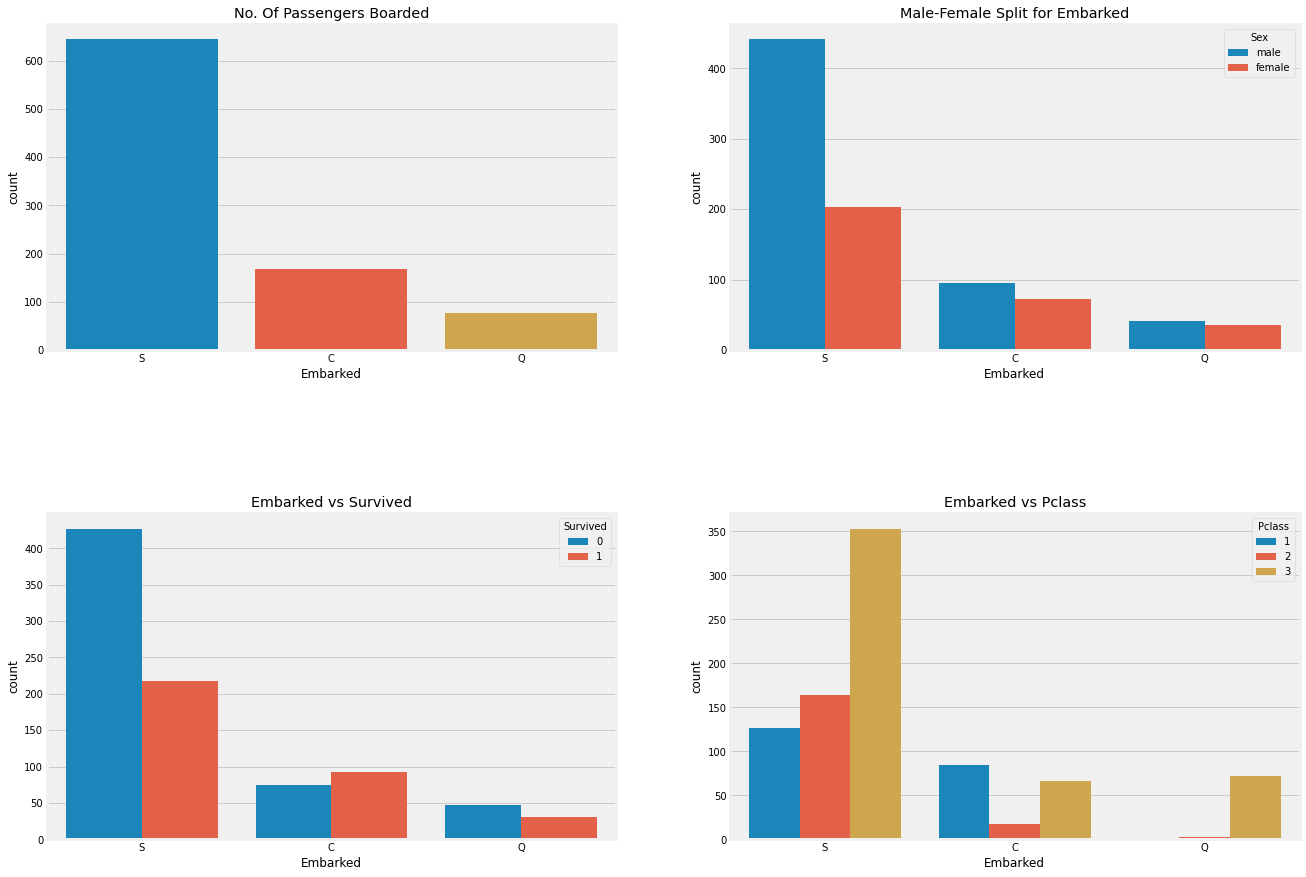

In [ ]:
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=data, ax=ax[0,0]) # 항만별 승선객 수 시각화 
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1]) # 항만별 승선객 수 성별에 따른 시각화 
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0]) # 항만별 승선객 수 성별에 생존자 시각화 
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass',  data=data, ax=ax[1,1]) # 항만별 승선객 수 객실등급별 생존자 시각화 
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**관찰결과:**

1) 최다 승선을 한 항만은 S항만이며 주된 객실은 3등급 객실이었다. 

2) C항만에서 승선한 승객들은 운이 좋은 것으로 보이는 데 그 이유는 1, 2등급 객실 승객을 우선 구조했기 때문이다. 

3) S항만의 승객들은 주로 부자들이 승선한 것으로 보인다. 하지만 여전히 생존률은 낮다, 왜냐하면 3등급 객실 승객의 81%가 살아남지 못했기 때문이다. 

4) Q항만은 대부분 3등급 객실의 고객으로 이루어져있다. 

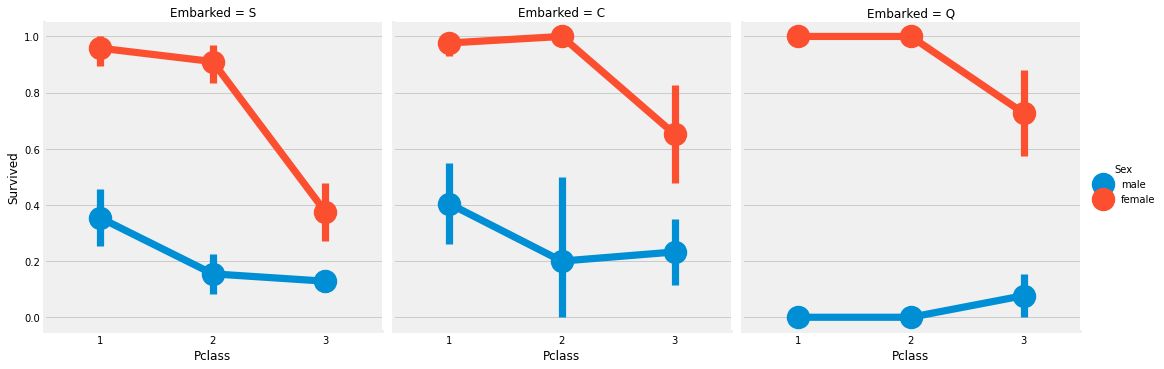

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()


**관찰결과 :**

1) 1등급 객실과 2등급 객실의 여성은 객실 등급에 관계없이 생존률은 거의 1에 가깝다. 

2) S항만의 사람들은 남녀 모두에서 3등급 객실에 사람들이 생존률이 매우 낮은 걸로 보아 운이 나쁘다할 수 있다. 

3) Q항만은 거의 모두가 3등급 객실에서 온 것으로 보아 남성에게는 맞지 않는 항만같다. 


**항만(Enbarked) 결측치 채워주기**

우리는 많은 승객들이 S항만에서 탑승한 것을 통해 결측치에 S항만의 값을 넣어준다. 

In [ ]:
data['Embarked'].fillna('S',inplace=True)

In [ ]:
data.Embarked.isnull().any() # 결측치 없는지 최종확인 

False

**SibSip -> 이산형 변수** 

이 변수는 혼자 온 고객 또는 가족과 함께 온 고객을 구분한다. 

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [ ]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


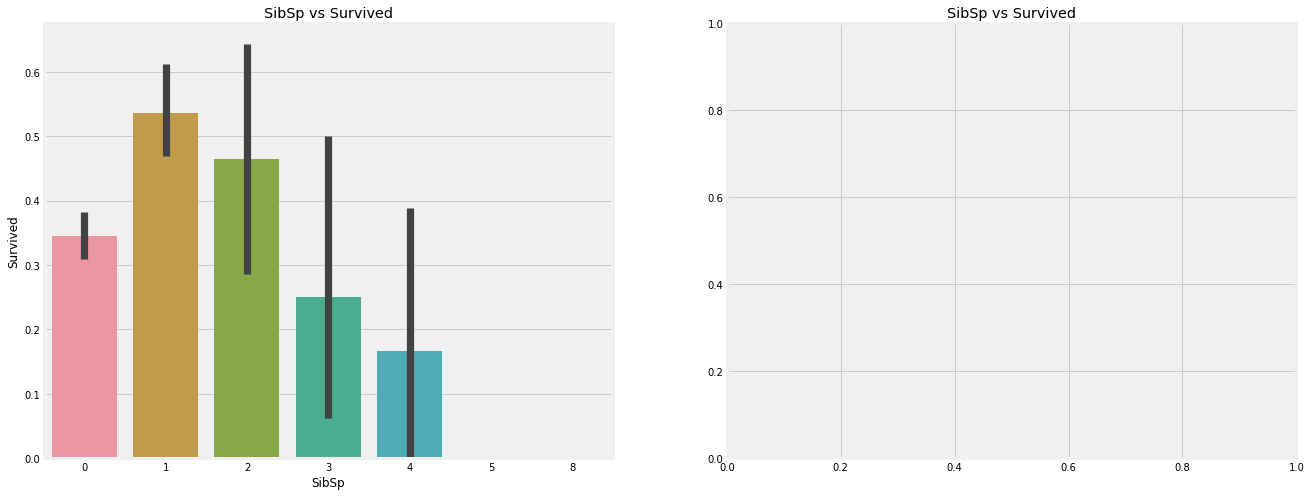

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [ ]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


**관찰결과 :** 

위 barplot과 factorplot은 가족의 수가 많아질 수록 생존률이 낮아지는 것을 확인할 수 있다. 이는 가족이 많아질 수록 자신을 챙기지 않고 가족을 챙기려는 경향이 생기기 때문일 거라 유추된다. 


**Parch**

In [ ]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


크로스탭은 3등급 객실에 많은 수의 가족단위 승객이 탓다는 것을 보여준다. 

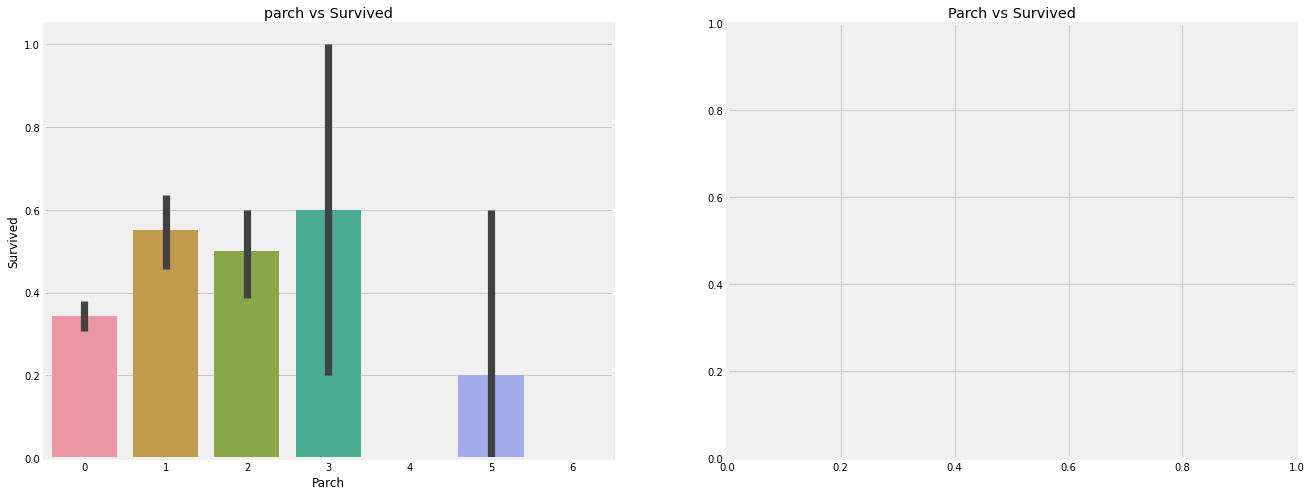

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('parch vs Survived')
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

**관찰결과 :**

부모를 동반한 승객은 생존 가능성이 더 크다. 하지만 가족의 숫자가 늘어날 수록 생존가능성은 줄어든다. 

생존 가능성은 배 안에 1~3명의 부모를 둔 사람에게 좋다. 혼자라는 것은 또한 치명적이고 누군가가 배에 4명 이상의 부모를 두고 있을 때 생존 가능성은 줄어든다. 
